# NLP of Negoisst Data

## Text-based Data Exploration and Cleansing

In [1]:
# Import libraries for data manipulation and analysis.
import numpy as np
import pandas as pd

# Import libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for text processing.
import nltk
import string
import re

# Suppress warnings to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Excel file into a DataFrame using the first column as the index.
df = pd.read_excel('Data_Group2.xlsx', index_col=0)
df

,ReceiverID,ActionType,NegoOutcome,Content
SenderID,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ..."
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte..."
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am..."
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ..."
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil..."
...,...,...,...,...
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."


In [3]:
# Calculate and display the total number of missing values in each column of the DataFrame.
df.isnull().sum()

ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [4]:
# Create column 'Length' to store the character count of each entry in the 'Content' column.
df['Length'] = df['Content'].str.len()
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length
SenderID,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349
32,31,Clarification,FinalAccept,"Dear Alex, Thanks for elaborating. Let's pop t...",134
31,32,FinalAccept,FinalAccept,Great! Hereby my official confirmation of the ...,113
33,34,Offer,FinalAccept,"Dear Chris, Hopefully you are doing well. Ther...",2220
34,33,Counteroffer,FinalAccept,"Dear Alex, Thanks a lot for your message! I am...",2282


In [5]:
# Define a function to count the number of words in a given text.
def word_count(content):
    content_list = content.split()
    return len(content_list)

# Apply the word_count function to the 'Content' column and create a new column for word counts.
df['Word count of nego message'] = df['Content'].apply(word_count)
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message
SenderID,,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778,309
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949,337
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693,123
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452,77
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349,249
32,31,Clarification,FinalAccept,"Dear Alex, Thanks for elaborating. Let's pop t...",134,22
31,32,FinalAccept,FinalAccept,Great! Hereby my official confirmation of the ...,113,18
33,34,Offer,FinalAccept,"Dear Chris, Hopefully you are doing well. Ther...",2220,381
34,33,Counteroffer,FinalAccept,"Dear Alex, Thanks a lot for your message! I am...",2282,407


In [6]:
# Count and display occurrences of each unique value in 'NegoOutcome' column.
df['NegoOutcome'].value_counts()

NegoOutcome
FinalAccept    1795
FinalReject     459
Name: count, dtype: int64

In [7]:
# Filter and store the 'Content' of rows where 'NegoOutcome' is 'FinalAccept' into a new DataFrame.
accepted_messages = df[df['NegoOutcome']=='FinalAccept']['Content']
accepted_messages

SenderID
31      Hey Chris, Great that we are working together ...
32      Hey Alex, The pleasure is all mine. For starte...
31      Hey Chris,  Thank you for your response.  I am...
32      Hello Alex, I think we have a solid compromis ...
31      Dear Chris, I am glad to hear that you are wil...
                              ...                        
1151    Dear Chris Meyer,\nIm happy that you accepted ...
1156    Dr. Mr Kramer,\nthank you for your fast reply....
1151    Dear Mr.Chris Meyer,\nI understand your proble...
1156    Dear Mr. Kramer,\nI propose we think out of th...
1151    Dear Mr.Meyer,\nThank you for your last offer....
Name: Content, Length: 1795, dtype: object

In [8]:
# Access and display the second message (index 1) from the filtered results.
accepted_messages.values[1]

"Hey Alex, The pleasure is all mine. For starters, I think it is important to acknowledge that the ISA plans to use the event as leverage to assure a successful start for the new office in Saint Petersburg.  This can be assured by establishing contacts to as many local business people and officials as possible. So we should partly adapt to the local culture. In that way, we can show the new members and guests that they are important and make them feel appreciated. Since they are needed for a successful start. Therefore we have to make changes in the catering and/or music act. My proposal is as following: The catering will be a local Russian cuisine. Our Russian contacts will highly appreciate the effort we are making and will experience it as a sort of celebration of their culture. This will enhance our chances regarding reaching business agreements based on mutual consent in the future. I agree with week 3 as the date of conference. DJ Happy is a very famous DJ but he might overshadow

In [9]:
# Amount of accepted messages.
accepted_messages.count()

1795

In [10]:
rejected_messages = df[df['NegoOutcome']=='FinalReject']['Content']
rejected_messages

SenderID
95     Hi Chris! I feel like we're really getting som...
96     Hi Alex, Thank you for your propositions. Howe...
95     Hi Chris! Thank you for your propositions as w...
96     Hi Alex, Thank you for your ideas. Also, you c...
95     Hi Chris, Thank you for your quick response! I...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 459, dtype: object

In [11]:
rejected_messages.values[1]

'Hi Alex, Thank you for your propositions. However i do not agree with some of them. For the Catering, a lot of important people will be present, it is a opportunity to creat long lasting bond with them. A formal dinner is more suitable for those CEO or spokespersons, it will show them that we care. In addition what could be better than local food for the local business owner. I am sur that we can find a chief to cook specialities everyone like. I agree for the week 3. A too famous artist could put the ISA event in the second plan and it is defenitly not the appropriate artist for that kind of event. A local russian band will show that we can adapt to this new country. I am glad that you think i am a good host, but what kind of experience do you have in show hosting? I know you are still a student. I did several months of internship and i am used to talk to businessmen. In addition i think your former proposition describe your taste in party, that is why i think I should host the speec

In [12]:
rejected_messages.count()

459

In [13]:
from sklearn import preprocessing

# Add variable to set outcome to 0 or 1.
df['NegoOutcomeLabel'] = df.NegoOutcome.map({'FinalReject':0, 'FinalAccept':1})
df.head()

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message,NegoOutcomeLabel
SenderID,,,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778,309,1
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949,337,1
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693,123,1
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452,77,1
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349,249,1


Text(0.5, 1.0, 'Rejected Messages')

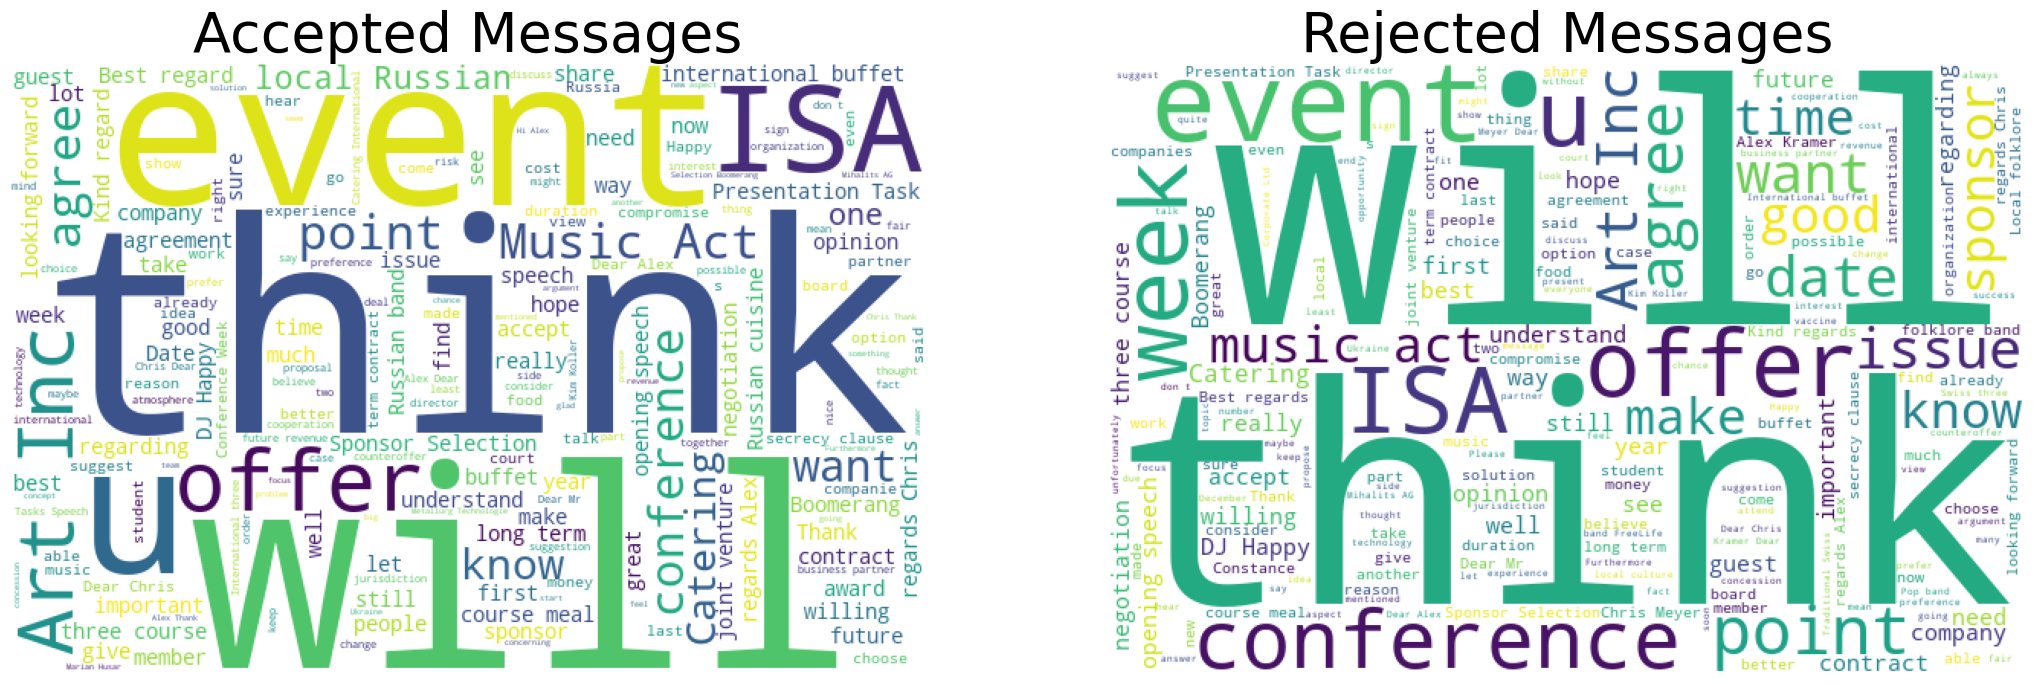

In [14]:
# Generate Word Clouds
from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[26,8])

wordcloud1 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(accepted_messages))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Accepted Messages', fontsize=40)

wordcloud2 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(rejected_messages))

ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Rejected Messages', fontsize=40)

## Text-based Processing

In [15]:
all_messages = df["Content"]
all_messages

SenderID
31     Hey Chris, Great that we are working together ...
32     Hey Alex, The pleasure is all mine. For starte...
31     Hey Chris,  Thank you for your response.  I am...
32     Hello Alex, I think we have a solid compromis ...
31     Dear Chris, I am glad to hear that you are wil...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2254, dtype: object

In [16]:
def clean_text(message):
    message = message.lower() # Convert the message to lowercase.
    
    message = re.sub('\[.*?\]', '', message) # Remove text inside square brackets.
    message = re.sub('https?://\S+|www\.\S+', '', message) # Remove URLs starting with http, https, or www.
    message = re.sub('<.*?>+', '', message) # Remove HTML tags.
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message) # Remove all punctuation.
    message = re.sub('\n', '', message) # Remove newline characters.
    message = re.sub('\w*\d\w*', '', message) # Remove words containing digits.

    return message

In [17]:
# Apply the clean_text function to the 'Content' column to clean each message.
df["Content"] = df["Content"].apply(lambda x: clean_text(x))
df["Content"].head()

SenderID
31    hey chris great that we are working together f...
32    hey alex the pleasure is all mine for starters...
31    hey chris  thank you for your response  i am g...
32    hello alex i think we have a solid compromis a...
31    dear chris i am glad to hear that you are will...
Name: Content, dtype: object

In [22]:
# Initialize a tokenizer to extract words from text.
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Apply the tokenizer to the 'Content' column, ensuring it only processes strings.
df['Content'] = df['Content'].apply(lambda x: tokenizer.tokenize(x) if isinstance(x, str) else x)

df['Content'].head()

SenderID
31    [hey, chris, great, that, we, are, working, to...
32    [hey, alex, the, pleasure, is, all, mine, for,...
31    [hey, chris, thank, you, for, your, response, ...
32    [hello, alex, i, think, we, have, a, solid, co...
31    [dear, chris, i, am, glad, to, hear, that, you...
Name: Content, dtype: object

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lila9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

In [25]:
# Define a function to remove stopwords from a list of words.
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')] # Keep only words that are not in the list of English stopwords.
    return words

# Apply the remove_stopwords function to the 'Content' column.
df['Content'] = df['Content'].apply(lambda x: remove_stopwords(x))
df['Content'].head()

SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starters, think, i...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object

In [28]:
# Two identical dataframes, one will be lemmatized one will be stemmerized.
stemm_df = df.copy()
lemm_df = df.copy()

stemm_df['Content']
lemm_df['Content']

SenderID
31     [hey, chris, great, working, together, competi...
32     [hey, alex, pleasure, mine, starters, think, i...
31     [hey, chris, thank, response, glad, hear, agre...
32     [hello, alex, think, solid, compromis, settled...
31     [dear, chris, glad, hear, willing, accept, ter...
                             ...                        
851    [dear, chis, meyer, thank, latest, offer, poin...
856    [dear, alex, kramerthank, much, latest, offer,...
851    [dear, chris, meyerthank, fast, answer, happy,...
856    [dear, alex, krameri, still, interested, comin...
851    [dear, chris, meyer, im, sorry, accept, less, ...
Name: Content, Length: 2254, dtype: object

In [35]:
print(lemm_df['Content'].head())

SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starter, think, im...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object


In [36]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer.
stemmer = PorterStemmer()

# Define a function to apply stemming to a list of tokens.
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply the stem_tokens function to the 'Content' column.
# Handle both string and list inputs by splitting strings or processing lists directly.
stemm_df['Content'] = stemm_df['Content'].apply(lambda x: stem_tokens(x.split()) if isinstance(x, str) else stem_tokens(x))

print(stemm_df['Content'].head())

SenderID
31    [hey, chri, great, work, togeth, competit, her...
32    [hey, alex, pleasur, mine, starter, think, imp...
31    [hey, chri, thank, respon, glad, hear, agr, da...
32    [hello, alex, think, solid, compromi, settl, w...
31    [dear, chri, glad, hear, will, accept, term, c...
Name: Content, dtype: object


In [37]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer.
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a list of tokens.
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply the lemmatize_tokens function to the 'Content' column.
lemm_df['Content'] = lemm_df['Content'].apply(lemmatize_tokens)

print(lemm_df['Content'].head())

SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starter, think, im...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object


In [49]:
# Define a function to combine a list of tokens into a single string.
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)  # Join the list of tokens with spaces.
    return combined_text

# Create a copy of the original DataFrame to preserve the original data.
df_combined = df.copy()

# Apply the combine_text function to the 'Content' column in the copied DataFrame.
df_combined['Content'] = df_combined['Content'].apply(lambda x: combine_text(x))
df_combined['Content']

SenderID
31     hey chris great working together competition h...
32     hey alex pleasure mine starters think importan...
31     hey chris thank response glad hear agree date ...
32     hello alex think solid compromis settled willi...
31     dear chris glad hear willing accept terms come...
                             ...                        
851    dear chis meyer thank latest offer points comp...
856    dear alex kramerthank much latest offer happy ...
851    dear chris meyerthank fast answer happy found ...
856    dear alex krameri still interested coming join...
851    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2254, dtype: object

In [50]:
df_combined.head()

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message,NegoOutcomeLabel
SenderID,,,,,,,
31,32,Offer,FinalAccept,hey chris great working together competition h...,1778,309,1
32,31,Counteroffer,FinalAccept,hey alex pleasure mine starters think importan...,1949,337,1
31,32,Counteroffer,FinalAccept,hey chris thank response glad hear agree date ...,693,123,1
32,31,Counteroffer,FinalAccept,hello alex think solid compromis settled willi...,452,77,1
31,32,Question,FinalAccept,dear chris glad hear willing accept terms come...,1349,249,1


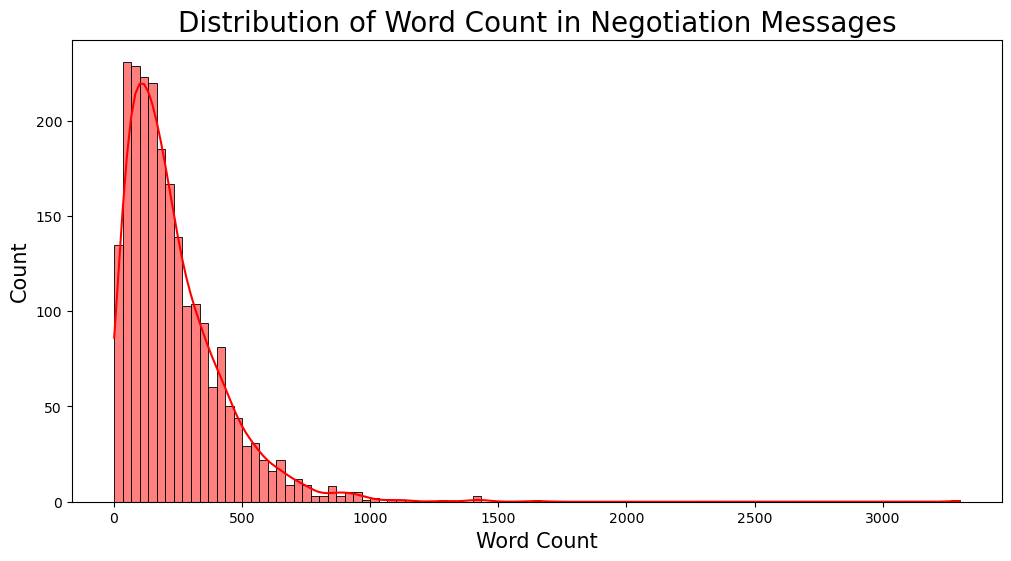

In [51]:
# Creating a barchart for visualizing word count.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df['Word count of nego message'], kde=True, color='red')
plt.title('Distribution of Word Count in Negotiation Messages', fontsize=20)
plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

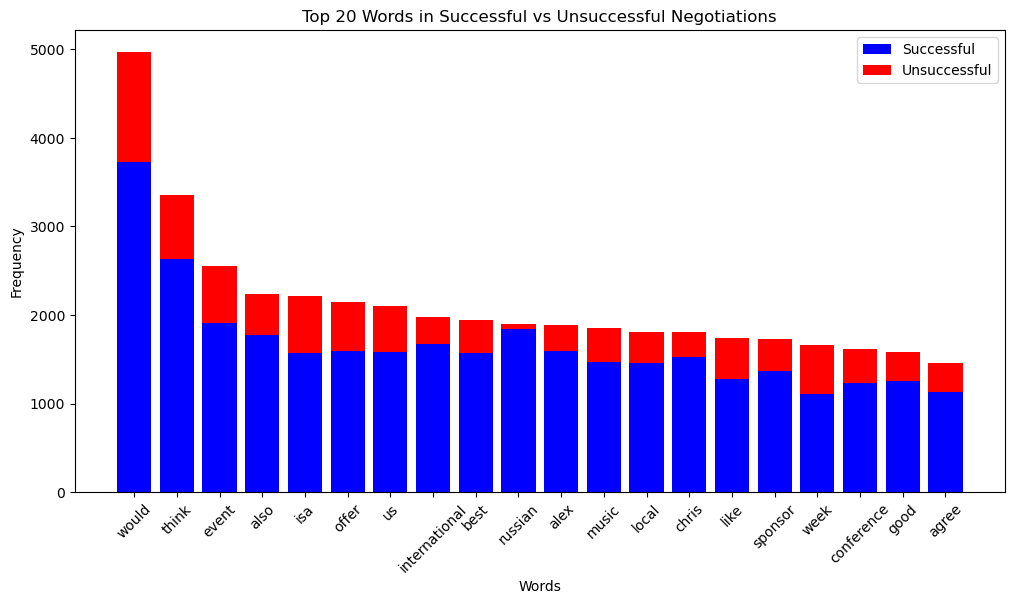

In [52]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def plot_top_words_by_outcome(df, text_column='Content', label_column='NegoOutcomeLabel', top_n=20):
    # Separate successful and unsuccessful negotiations
    successful_text = ' '.join(df[df[label_column] == 1][text_column])
    unsuccessful_text = ' '.join(df[df[label_column] == 0][text_column])
    
    # Tokenize and clean text
    successful_words = re.findall(r'\b\w+\b', successful_text.lower())
    unsuccessful_words = re.findall(r'\b\w+\b', unsuccessful_text.lower())
    
    # Count word occurrences
    successful_counts = Counter(successful_words)
    unsuccessful_counts = Counter(unsuccessful_words)
    
    # Combine counts and keep the top N words
    combined_counts = successful_counts + unsuccessful_counts
    common_words = combined_counts.most_common(top_n)
    
    # Separate word counts for successful and unsuccessful cases
    words = [word for word, _ in common_words]
    success_counts = [successful_counts[word] for word in words]
    unsuccess_counts = [unsuccessful_counts[word] for word in words]
    
    # Plotting
    x = range(len(words))
    plt.figure(figsize=(12, 6))
    plt.bar(x, success_counts, color='blue', label='Successful')
    plt.bar(x, unsuccess_counts, color='red', label='Unsuccessful', bottom=success_counts)
    
    plt.xticks(x, words, rotation=45)
    plt.title(f'Top {top_n} Words in Successful vs Unsuccessful Negotiations')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage:
# Assuming df_combined is your dataframe
plot_top_words_by_outcome(df_combined, text_column='Content', label_column='NegoOutcomeLabel', top_n=20)

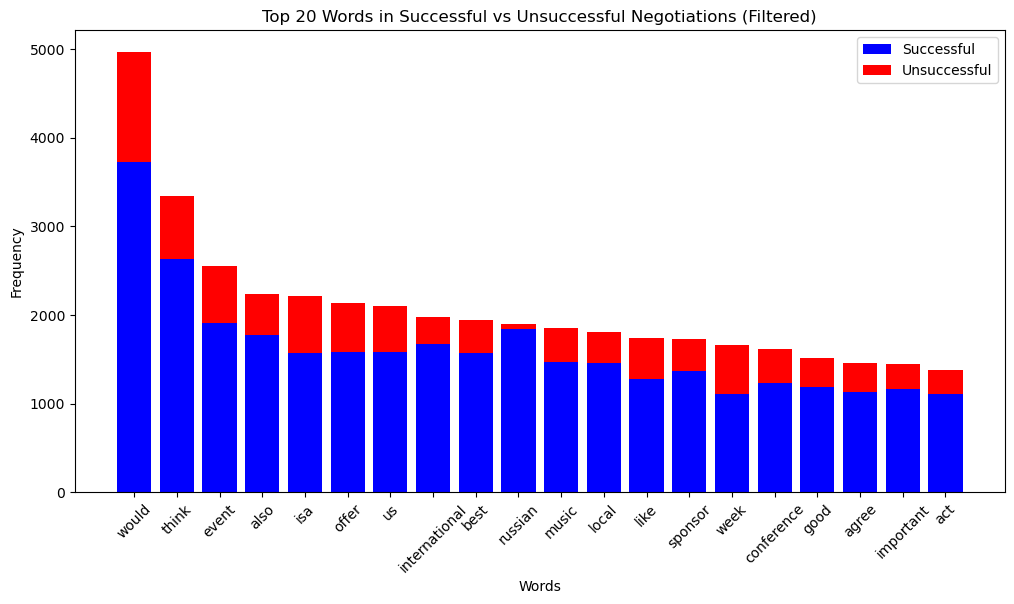

In [53]:
def plot_top_words_filtered_by_name(df, text_column='Content', label_column='NegoOutcomeLabel', top_n=20):
    # Function to filter out the first 2 words if they contain a name
    def filter_names(text):
        words = text.split()  # Split text into words
        if len(words) > 2:  # Ensure there are at least 2 words to check
            words = words[2:]  # Remove the first 2 words
        return ' '.join(words)  # Rejoin the filtered words into a string

    # Apply the filtering to the text column
    df[text_column] = df[text_column].apply(filter_names)
    
    # Separate successful and unsuccessful negotiations
    successful_text = ' '.join(df[df[label_column] == 1][text_column])
    unsuccessful_text = ' '.join(df[df[label_column] == 0][text_column])
    
    # Tokenize and clean text
    successful_words = re.findall(r'\b\w+\b', successful_text.lower())
    unsuccessful_words = re.findall(r'\b\w+\b', unsuccessful_text.lower())
    
    # Count word occurrences
    successful_counts = Counter(successful_words)
    unsuccessful_counts = Counter(unsuccessful_words)
    
    # Combine counts and keep the top N words
    combined_counts = successful_counts + unsuccessful_counts
    common_words = combined_counts.most_common(top_n)
    
    # Separate word counts for successful and unsuccessful cases
    words = [word for word, _ in common_words]
    success_counts = [successful_counts[word] for word in words]
    unsuccess_counts = [unsuccessful_counts[word] for word in words]
    
    # Plotting
    x = range(len(words))
    plt.figure(figsize=(12, 6))
    plt.bar(x, success_counts, color='blue', label='Successful')
    plt.bar(x, unsuccess_counts, color='red', label='Unsuccessful', bottom=success_counts)
    
    plt.xticks(x, words, rotation=45)
    plt.title(f'Top {top_n} Words in Successful vs Unsuccessful Negotiations (Filtered)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage:
# Assuming df_combined is your dataframe
plot_top_words_filtered_by_name(df_combined, text_column='Content', label_column='NegoOutcomeLabel', top_n=20)

## Text Representation Techniques

### Bag of Words (BoW)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
# Ensure all entries in 'Content' are strings
df_combined['Content'] = df['Content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Handle missing values if any
df_combined['Content'] = df_combined['Content'].fillna('')

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Apply CountVectorizer to the text column
message_vector = count_vectorizer.fit_transform(df['Content'])
message_vector

<2254x11443 sparse matrix of type '<class 'numpy.int64'>'
	with 190283 stored elements in Compressed Sparse Row format>

In [61]:
message_array = message_vector.toarray()
df_countvectorizer = pd.DataFrame(data=message_array, columns=count_vectorizer.get_feature_names_out())
print(df_countvectorizer)

      aand  abandon  abandoning  abe  aber  abilities  ability  abillity  \
0        0        0           0    0     0          0        0         0   
1        0        0           0    0     0          0        0         0   
2        0        0           0    0     0          0        0         0   
3        0        0           0    0     0          0        0         0   
4        0        0           0    0     0          0        0         0   
...    ...      ...         ...  ...   ...        ...      ...       ...   
2249     0        0           0    0     0          0        0         0   
2250     0        0           0    0     0          0        0         0   
2251     0        0           0    0     0          0        0         0   
2252     0        0           0    0     0          0        0         0   
2253     0        0           0    0     0          0        0         0   

      abilty  able  ...  youyour  youyours  zealand  zero  zone  zurich  \
0          0

In [62]:
df_countvectorizer.columns

Index(['aand', 'abandon', 'abandoning', 'abe', 'aber', 'abilities', 'ability',
       'abillity', 'abilty', 'able',
       ...
       'youyour', 'youyours', 'zealand', 'zero', 'zone', 'zurich', 'zurick',
       'zvrzahl', 'zürich', 'ánd'],
      dtype='object', length=11443)

### Term Frequency-Inverse Document Frequency (TF-IDF)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['Content'])
tfidf_message_vector = tfidf_vectorizer.transform(df['Content'])

In [65]:
tfidf_message_vector.shape

(2254, 11443)

In [66]:
message_tfidf_array = tfidf_message_vector.toarray()
df_tfidf = pd.DataFrame(data=message_tfidf_array, columns = tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)

      aand  abandon  abandoning  abe  aber  abilities  ability  abillity  \
0      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
1      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
3      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
4      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
...    ...      ...         ...  ...   ...        ...      ...       ...   
2249   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2250   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2251   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2252   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2253   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   

      abilty      able  ...  youyour  youyours  zealand  zero  zone  zurich  \
0       

### Word Embedding

In [72]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk

In [73]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lila9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
def preprocess_text(text):
    tokens = simple_preprocess(text)
    return [word for word in tokens if word not in stop_words]

In [75]:
corpus = df_combined['Content']
preprocessed_corpus = [preprocess_text(doc) for doc in corpus]

In [76]:
# Train Word2Vec Model
model = Word2Vec(
    sentences=preprocessed_corpus,  # Preprocessed sentences
    vector_size=100,                # Size of word vectors
    window=5,                       # Context window size
    min_count=2,                    # Minimum word frequency
    workers=4,                      # Number of threads
    sg=1                            # Skip-gram model (set 0 for CBOW)
)

In [77]:
# Save the model to ensure reusability
model_path = "word2vec_model.model"
model.save(model_path)

In [83]:
# Example: Accessing a word vector
word = "accept" 
if word in model.wv:
    print(f"Vector for '{word}': {model.wv[word]}")

# Example: Finding similar words
try:
    similar_words = model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}': {similar_words}")
except KeyError:
    print(f"Word '{word}' not in vocabulary.")

Vector for 'accept': [ 0.01188747  0.51459837 -0.19492143 -0.68758553  0.00725344 -0.7306242
  0.06974038  0.06731039  0.07219042 -0.16633697  0.29431844 -0.32540846
  0.09666871  0.01309188  0.11256009 -0.01475479  0.0808771  -0.05017407
  0.11900861 -0.59287506 -0.09756123  0.5719832  -0.16745514  0.10863182
 -0.36184508 -0.12175588 -0.01112795  0.21448524 -0.01070462 -0.40216878
  0.47701335  0.07480698  0.36114386 -0.08035665  0.0526726   0.71367234
  0.44247285 -0.02950755  0.00500471 -0.75444037  0.06768625 -0.11170002
 -0.26107198 -0.49062604 -0.31044924 -0.19069107 -0.31111357 -0.12237433
  0.13547726  0.16769454 -0.2292716   0.01742024 -0.11830509  0.26625982
  0.21808401  0.42620015 -0.16808724 -0.00194916 -0.17662653  0.1486408
  0.0670012   0.1956885  -0.0340363   0.10540494  0.14349602  0.12605402
  0.19726057  0.07825155 -0.12355638  0.08146255 -0.13714086 -0.1832898
  0.24901687  0.1820348  -0.441313    0.08867276 -0.37592334 -0.12787174
 -0.4857324   0.1183864   0.00452

In [84]:
# Example: Accessing a word vector
word = "reject" 
if word in model.wv:
    print(f"Vector for '{word}': {model.wv[word]}")

# Example: Finding similar words
try:
    similar_words = model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}': {similar_words}")
except KeyError:
    print(f"Word '{word}' not in vocabulary.")

Vector for 'reject': [-0.06078977  0.15881547 -0.04356192 -0.42089686 -0.02798846 -0.5568626
 -0.11216121  0.228695   -0.23868541 -0.19178592 -0.012737   -0.41089818
  0.01278553 -0.14691658  0.2537283  -0.08575281  0.09887168 -0.09041504
 -0.18680143 -0.44113895 -0.08342178  0.33606797  0.14640561 -0.13052574
 -0.20847876  0.09796453 -0.05063365 -0.01526069 -0.097668   -0.21342997
  0.3205278  -0.02270537  0.16601548 -0.0359064  -0.02666691  0.4194047
  0.3419369  -0.00251162 -0.1377218  -0.4515757   0.03724164 -0.09178574
 -0.03116705 -0.31072116 -0.02434657 -0.05624373 -0.2562594   0.03363408
  0.04843401  0.03679789 -0.2400844  -0.04259708 -0.04676083  0.01628332
 -0.04825735  0.3282426   0.08227932 -0.06249161  0.03519437  0.2805909
 -0.03378966  0.00595254  0.05210486  0.10424083 -0.0371917   0.16689537
 -0.10596926 -0.0411897  -0.09749411  0.10572308 -0.1093932   0.01114979
  0.32280034  0.02940357  0.16312075  0.27734286 -0.09471037 -0.08231494
 -0.3140972   0.10499384  0.09054

In [85]:
# Save the DataFrames as CSV files
df.to_csv('df.csv', index=False)
df_combined.to_csv('df_combined.csv', index=False)
stemm_df.to_csv('stemm_df.csv', index=False)
lemm_df.to_csv('lemm_daf.csv', index=False)